['2326.124668121338', '2206.4623832702637', '2090.8966064453125', '2269.3796157836914', '2127.3393630981445', '2109.870672225952', '2012.9783153533936', '2202.672243118286', '2169.9459552764893', '2052.635431289673', '2096.550226211548', '2038.1419658660889', '2395.3192234039307', '2083.453893661499', '2247.1303939819336', '2195.256233215332', '2102.905750274658', '2104.5596599578857', '2093.6474800109863', '2056.21337890625', '2173.0222702026367', '2120.527982711792', '2128.0012130737305', '2156.4042568206787', '2040.9877300262451', '2106.9700717926025', '2129.9235820770264', '2078.7768363952637', '2100.867986679077', '2123.5251426696777', '2135.3745460510254', '2013.2818222045898', '2129.190444946289', '2007.561445236206', '2278.416156768799', '2173.182249069214', '2048.7143993377686', '2194.1399574279785', '2116.9822216033936', '1991.1136627197266', '2100.5070209503174', '2027.7132987976074', '2359.0736389160156', '2179.1203022003174', '2037.3544692993164', '2161.555290222168', '216

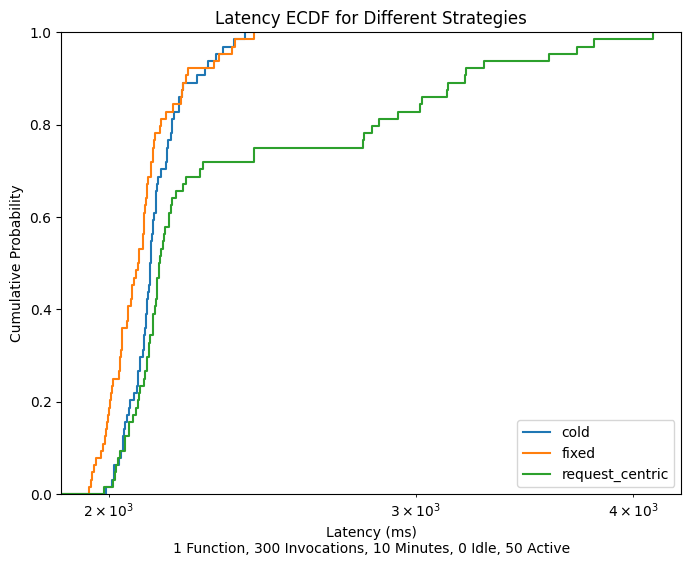

In [1]:
import re
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize a dictionary to store latency values for each strategy
strategy_labels = ['cold', 'fixed', 'request_centric']
strategy_data = {}
idle = 0
active = 50

# Read and process data from each file
for strategy in strategy_labels:
    file_name = f'results/video-{strategy}.log'
    try:
        with open(file_name, 'r') as file:
            log_data = file.read()
    except UnicodeDecodeError:
        pass
    # Extract latency numbers
    latency_pattern = r'Latency: (\d+\.\d+) ms'
    latency_values = re.findall(latency_pattern, log_data)
    print(latency_values)
    latency_values = [float(value) for value in latency_values]
    print(f"{strategy}:{np.median(latency_values)}")

    # Store latency values for the strategy
    strategy_data[strategy] = latency_values

# Create a plot
fig, ax = plt.subplots(figsize=(8, 6))

# Plot ECDFs for each strategy
for strategy in strategy_labels:
    print(strategy)
    sns.ecdfplot(data=strategy_data[strategy], label=strategy)

# Set labels and title for the plot
plt.xlabel(f'Latency (ms)\n1 Function, 300 Invocations, 10 Minutes, {idle} Idle, {active} Active')
plt.xscale("log")
plt.ylabel('Cumulative Probability')
plt.title('Latency ECDF for Different Strategies')
plt.legend()

# Show the plot
plt.show()